# DX 704 Week 1 Project

This week's project will build a portfolio risk and return model, and make investing recommendations for hypothetical clients.
You will collect historical data, estimate returns and risks, construct efficient frontier portfolios, and sanity check the certainty of the maximum return portfolio.

The full project description and a template notebook are available on GitHub at the following link.

https://github.com/bu-cds-dx704/dx704-project-01


Feel free to use optimization tools or libraries (such as CVXOPT or scipy.optimize) to perform any calculations required for this mini project.

### Example Code

You may find it helpful to refer to these GitHub repositories of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples
* https://github.com/bu-cds-omds/dx603-examples
* https://github.com/bu-cds-omds/dx704-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Part 1: Collect Data

Collect historical monthly price data for the last 24 months covering 6 different stocks.
The data should cover 24 consecutive months including the last month that ended before this week's material was released on Blackboard.
To be clear, if a month ends between the Blackboard release and submitting your project, you do not need to add that month.

The six different stocks must include AAPL, SPY and TSLA.
At least one of the remaining 3 tickers must start with the same letter as your last name (e.g. professor Considine could use COIN).
This is to encourage diversity in what stocks you analyze; if you discuss this project with classmates, please make sure that you pick different tickers to differentiate your work.
Do not pick stocks with fewer than 24 consecutive months of price data.

In [1]:
# Collect and import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import cvxpy as cp

Save the data as a TSV file named "historical_prices.tsv" and include a header row with the column names "date" and the 6 stock ticker symbols.
The date should be the last trading day of the month, so it may not be the last day of the month.
For example, the last trading day of November 2024 was 2024-11-29.
The remaining columns should contain the adjusted closing prices of the corresponding stock tickers on that day.


In [2]:
# Import the historical data and format the date column
df = pd.read_csv('submission/historical_prices.tsv', sep='\t')
df.set_index('date', inplace=True)
df.head()

,AAPL,TSLA,SPY,VISA,BRK-B,AMZN
date,,,,,,
2023-10-01,169.11,200.84,408.79,231.64,341.33,133.09
2023-11-01,188.11,240.08,446.14,252.90,360.00,146.09
2023-12-01,190.91,248.48,464.62,257.06,356.66,151.94
2024-01-01,182.85,187.29,473.93,269.81,383.74,155.20
2024-02-01,179.23,201.88,498.67,279.07,409.40,176.76


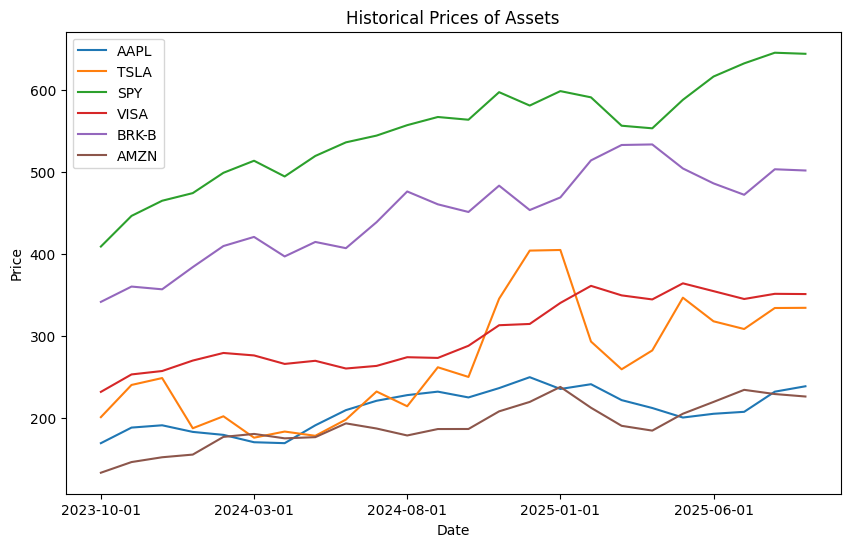

In [3]:
df.plot(figsize=(10,6))
plt.title('Historical Prices of Assets')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='upper left')
plt.show()

Submit "historical_prices.tsv" in Gradescope.

## Part 2: Calculate Historical Asset Returns

Calculate the historical asset returns based on the price data that you previously collected.

In [4]:
historical_returns = df.pct_change().dropna()
historical_returns.head()

,AAPL,TSLA,SPY,VISA,BRK-B,AMZN
date,,,,,,
2023-11-01,0.112353,0.195379,0.091367,0.091780,0.054698,0.097678
2023-12-01,0.014885,0.034988,0.041422,0.016449,-0.009278,0.040044
2024-01-01,-0.042219,-0.246257,0.020038,0.049599,0.075927,0.021456
2024-02-01,-0.019798,0.077901,0.052202,0.034320,0.066868,0.138918
2024-03-01,-0.050047,-0.129235,0.029498,-0.010750,0.027162,0.020480


Save the data as a TSV file named "historical_returns.tsv" and include a header row with the column names "date" and the 6 stock ticker symbols.
Each row should have the date at the end of the month and the corresponding *relative* price changes.
For example, if the previous price was \$100 and the new price is \$110, the return value should be 0.10.
There should only be 23 rows of data in this file, since they are computed as the differences of 24 prices.

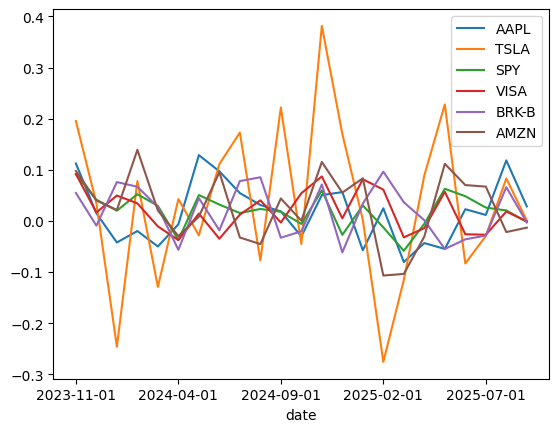

In [5]:
# Export the historical returns to a TSV file
historical_returns.to_csv('submission/historical_returns.tsv', sep='\t')
historical_returns.plot()
None

Submit "historical_returns.tsv" in Gradescope.

## Part 3: Estimate Returns

Estimate the expected returns for each asset using the previously calculated return data.
Just compute the average (mean) return for each asset over your data set; do not use other estimators that have been mentioned.
This will serve as your estimate of expected return for each asset.

In [6]:
# Calculate the average return per stock
estimated_returns = historical_returns.mean()
estimated_returns

AAPL     0.016725
TSLA     0.033922
SPY      0.020513
VISA     0.018979
BRK-B    0.018090
AMZN     0.025447
dtype: float64

Save the estimated returns in a TSV file named "estimated_returns.tsv" and include a header row with the column names "asset" and "estimated_return".

In [7]:
# Add header column to the estimated returns dataframe
estimated_returns_file = estimated_returns.reset_index()
estimated_returns_file.columns = ['asset', 'estimated_return']

# Save the Estimated Returns to a TSV file
estimated_returns_file.to_csv('submission/estimated_returns.tsv', sep='\t', index=False)

Submit "estimated_returns.tsv" in Gradescope.

## Part 4: Estimate Risk

Estimate the covariance matrix for the asset returns to understand how the assets move together.

In [8]:
# Calculate the covariance matrix of returns
estimated_covariance = historical_returns.cov()
estimated_covariance

,AAPL,TSLA,SPY,VISA,BRK-B,AMZN
AAPL,0.003582,0.003027,0.000740,0.000125,0.000524,0.000442
TSLA,0.003027,0.024400,0.001971,0.001035,-0.001960,0.005832
SPY,0.000740,0.001971,0.001214,0.000684,0.000336,0.001722
VISA,0.000125,0.001035,0.000684,0.001633,0.001031,0.000744
BRK-B,0.000524,-0.001960,0.000336,0.001031,0.002592,-0.000916
AMZN,0.000442,0.005832,0.001722,0.000744,-0.000916,0.004566


Save the estimated covariances to a TSV file named "estimated_covariance.tsv".
The header row should have a blank column name followed by the names of the assets.
Each data row should start with the name of an asset for that row, and be followed by the individual covariances corresponding to that row and column's assets.
(This is the format of pandas's `to_csv` method with `sep="\t"` when used on a covariance matrix as computed in the examples.)

In [9]:
# Save the covariance matrix to a TSV file
estimated_covariance.to_csv('submission/estimated_covariance.tsv', sep='\t')

Submit "estimated_covariance.tsv" in Gradescope.

## Part 5: Construct the Maximum Return Portfolio

Compute the maximum return portfolio based on your previously estimated risks and returns.

In [10]:
# number of variables and constraints
n = len(estimated_returns)
x_max_return = cp.Variable(n)

objective_max_return = cp.Maximize(estimated_returns.to_numpy().reshape(1, -1) @ x_max_return)
problem_max_return = cp.Problem(objective_max_return, [0 <= x_max_return, cp.sum(x_max_return) == 1])

estimated_max_return = problem_max_return.solve()
# weights (sum to 1)
max_return_weights = x_max_return.value
# scalar expected return of the max-return portfolio
max_return = float(estimated_returns.to_numpy() @ max_return_weights)

Save the maximum return portfolio in a TSV file named "maximum_return.tsv".
The header row should have two columns, "asset" and "allocation".
The allocation values should sum up to one.


In [11]:
# Save the maximum return and the allocations to a TSV file
max_return_allocation = pd.DataFrame({'asset': estimated_returns.index, 'allocation': max_return_weights})
max_return_allocation.to_csv('submission/maximum_return.tsv', sep='\t', index=False)

Submit "maximum_return.tsv" in Gradescope.

## Part 6: Construct the Minimum Risk Portfolio

Compute the minimum return portfolio based on your previously estimated risks and returns.

In [12]:
# constraints
x_min_risk = cp.Variable(n)
objective_min_risk = cp.Minimize(x_min_risk.T @ estimated_covariance.to_numpy() @ x_min_risk)
problem_min_risk = cp.Problem(objective_min_risk, [0 <= x_min_risk, cp.sum(x_min_risk) == 1])
cov_min_risk = problem_min_risk.solve()

Save the minimum risk portfolio in a TSV file named "minimum_risk.tsv".
The header row should have two columns, "asset" and "allocation".
The allocation values should sum up to one.


In [13]:
# Save the minimum risk portfolio to a TSV file
min_risk_allocation = pd.DataFrame({'asset': estimated_returns.index, 'allocation': x_min_risk.value})
min_risk_allocation.to_csv('submission/minimum_risk.tsv', sep='\t', index=False)

Submit "minimum_risk.tsv" in Gradescope.

## Part 7: Build Efficient Frontier Portfolios

Compute 101 portfolios along the mean-variance efficient frontier with evenly spaced estimated returns.
The first portfolio should be the minimum risk portfolio from part 4, and the last portfolio should be the maximum return portfolio from part 3.
The estimated return of each portfolio should be higher than the previous by one percent of the difference between the first and last portfolios.
That is, the estimated return of the portfolios should be similar to `np.linspace(min_risk_return, max_return, 101)`.


In [14]:
# Find the minimum return from the minimum risk portfolio and the maximum return from the maximum return portfolio
estimated_min_risk_return = estimated_returns @ x_min_risk.value
estimated_return_max_return = estimated_returns @ max_return_weights
estimated_variance = historical_returns.var()

In [15]:
risks = []
returns = []
portfolios = []

for i in np.linspace(estimated_min_risk_return, estimated_return_max_return, 101):
    n = len(estimated_returns)
    x_r = cp.Variable(n)
    prob = cp.Problem(cp.Minimize(x_r.T @ estimated_covariance.to_numpy() @ x_r), 
                      [0 <= x_r, cp.sum(x_r) == 1, estimated_returns.to_numpy().reshape(1, -1) @ x_r == i])
    
    risks.append(prob.solve())
    returns.append(i)
    portfolios.append(x_r.value)

portfolios = np.asarray(portfolios)
returns = np.asarray(returns)
risks = np.asarray(risks)

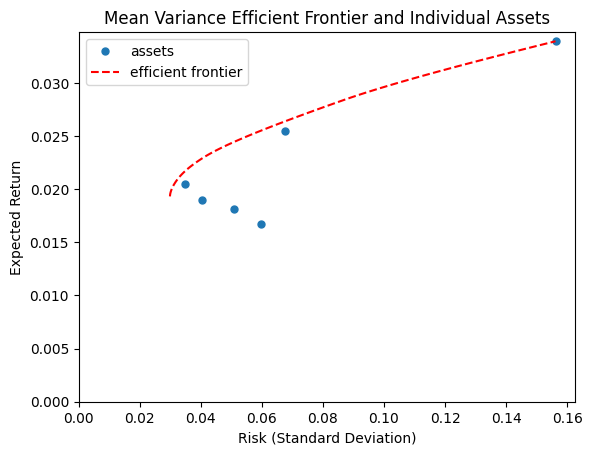

In [16]:
plt.plot(np.sqrt(estimated_variance), estimated_returns, label='assets', linestyle='None', marker='o', markersize=5)
plt.plot(np.sqrt(risks), returns, label='efficient frontier', linestyle='--', color='red')

plt.legend()
plt.title('Mean Variance Efficient Frontier and Individual Assets')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.xlim(0)
plt.ylim(0)
plt.show()

Save the portfolios in a TSV file named "efficient_frontier.tsv".
The header row should have columns "index", "return", "risk", and all the asset tickers.
Each data row should have the portfolio index (0-100), the estimated return of the portfolio, the estimated standard deviation (not variance) of the portfolio, and all the asset allocations (which should sum to one).

In [17]:
# Save the portfolios in a TSV file
assets = pd.DataFrame(portfolios, columns=estimated_returns.index)
frontier = pd.DataFrame({'index': range(len(portfolios)), 'return': returns, 'risk': risks}, index=None)
portfolios_df = pd.concat([frontier, assets], axis=1)
portfolios_df.to_csv('submission/efficient_frontier.tsv', sep='\t', index=False)

Submit "efficient_frontier.tsv" in Gradescope.

In [18]:
portfolios_df

,index,return,risk,AAPL,TSLA,SPY,VISA,BRK-B,AMZN
0,0,0.019323,0.000893,1.154379e-01,-4.728243e-20,4.906797e-01,2.266831e-01,1.671992e-01,-1.948093e-20
1,1,0.019469,0.000895,1.028280e-01,3.131092e-18,4.901826e-01,2.099424e-01,1.773580e-01,1.968905e-02
2,2,0.019615,0.000900,9.470437e-02,2.927835e-18,4.726992e-01,1.952038e-01,1.918292e-01,4.556349e-02
3,3,0.019761,0.000908,8.634398e-02,5.655586e-04,4.566761e-01,1.805759e-01,2.061558e-01,6.968266e-02
4,4,0.019907,0.000919,7.624081e-02,5.294123e-03,4.514019e-01,1.667632e-01,2.194185e-01,8.088147e-02
...,...,...,...,...,...,...,...,...,...
96,96,0.033338,0.021923,-1.044214e-22,9.310924e-01,-6.713111e-23,-6.320503e-23,-9.654760e-23,6.890764e-02
97,97,0.033484,0.022527,-4.115404e-23,9.483193e-01,-3.292202e-23,-4.346384e-23,-3.891792e-23,5.168073e-02
98,98,0.033630,0.023141,-9.947589e-23,9.655462e-01,-7.241523e-23,-7.854836e-23,-8.810354e-23,3.445382e-02
99,99,0.033776,0.023765,-7.021018e-23,9.827731e-01,-4.898015e-23,-5.343895e-23,-5.311521e-23,1.722691e-02


## Part 8: Check Maximum Return Portfolio Stability

Check the stability of the maximum return portfolio by resampling the estimated risk/return model.

Repeat 1000 times -
1. Use `np.random.multivariate_normal` to generate 23 return samples using your previously estimated risks and returns.
2. Estimate the return of each asset using that resampled return history.
3. Check which asset had the highest return in those resampled estimates.

This procedure is a reduced and simplified version of the Michaud resampled efficient frontier procedure that takes uncertainty in the risk model into account.

In [19]:
# Create a simulation of the efficient frontier
n_sims = 1000
np.random.seed(42) # comment out for defferent results

# Setup
asset_names = list(estimated_returns.index)
n_assets = len(asset_names)
n_periods = historical_returns.shape[0]  # 23
means = estimated_returns.to_numpy()
cov = estimated_covariance.to_numpy()

# Simulate and record which asset would be max-return each time
winner_counts = np.zeros(n_assets, dtype=int)

for _ in range(n_sims):
    sample = np.random.multivariate_normal(mean=means, cov=cov, size=n_periods)  # shape: (23, n_assets)
    sample_means = sample.mean(axis=0)  # estimated mean returns in this simulation
    winner_idx = int(np.argmax(sample_means))  # max-return portfolio puts 100% in this asset
    winner_counts[winner_idx] += 1

max_return_prob = winner_counts / n_sims

Save a file "max_return_probabilities.tsv" with the distribution of highest return assets.
The header row should have columns "asset" and "probability".
There should be a data row for each asset and its sample probability of having the highest return based on those 1000 resampled estimates.


,asset,probability
0,TSLA,0.535
1,AMZN,0.172
2,BRK-B,0.140
3,AAPL,0.083
4,VISA,0.047
5,SPY,0.023


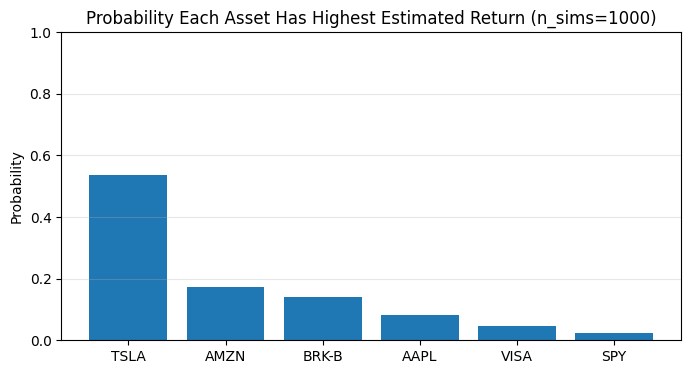

In [20]:
# Save probabilities of being the max-return asset
max_return_df = (
    pd.DataFrame({'asset': asset_names, 'probability': max_return_prob})
      .sort_values('probability', ascending=False)
      .reset_index(drop=True)
)
max_return_df.to_csv('submission/max_return_probabilities.tsv', sep='\t', index=False)
display(max_return_df)

# Optional: quick plot
plt.figure(figsize=(8,4))
plt.bar(max_return_df['asset'], max_return_df['probability'])
plt.ylabel('Probability')
plt.title('Probability Each Asset Has Highest Estimated Return (n_sims=1000)')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)
plt.show()

Submit "max_return_probabilities.tsv" in Gradescope.

## Part 9: Acknowledgments

Make a file "acknowledgments.txt" documenting any outside sources or help on this project.
If you discussed this assignment with anyone, please acknowledge them here.
If you used any libraries not mentioned in this module's content, please list them with a brief explanation what you used them for.
If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the generative AI policy.
If no acknowledgements are appropriate, just write none in the file.


Submit "acknowledgements.txt" in Gradescope.

In [21]:
# Create a text file with acknowledgements of assistance used for this mini project
with open('submission/acknowledgements.txt', 'w', encoding='utf-8') as f:
    f.write("Acknowledgements\n")
    f.write("================\n")
    f.write("I would like to thank the following resources for their assistance in this project:\n")
    f.write("- My peers for their valuable feedback on Piazza; retrieving the data from Yahoo Finance was trickier than anticipated. Eventually copied and pasted the adj. close prices from the website into a spreadsheet to consolidate.\n")
    f.write("- The content from this week's lesson material was very helpful, including the videos posted by Professor Considine.\n")
    f.write("- I utilized GPT-5 for assistance on Part 8 which was the most difficult.\n")

    f.write("\nGenerative AI Prompts and Responses\n")
    f.write("===================================\n")

    # Prompt 1 + Response
    f.write("\nPrompt 1:\n")
    f.write("How would I go about checking the stability of the maximum return portfolio by resampling the estimated risk/return model?\n\n")
    f.write("Response:\n")
    f.write("Here’s a concise way to do the Part 8 resampling check. It simulates 23 monthly return draws from a multivariate normal with your estimated mean vector and covariance, recomputes which asset would be max-return (i.e., has the highest sample mean), repeats 1000 times, and writes the probabilities.\n\n")
    f.write("```python\n")
    f.write("n_sims = 1000\n")
    f.write("asset_names = list(estimated_returns.index)\n")
    f.write("n_assets = len(asset_names)\n")
    f.write("n_periods = historical_returns.shape[0]  # 23\n")
    f.write("means = estimated_returns.to_numpy()\n")
    f.write("cov = estimated_covariance.to_numpy()\n")
    f.write("\n")
    f.write("# Symmetrize and add tiny jitter to ensure positive-definite covariance\n")
    f.write("cov = (cov + cov.T) / 2\n")
    f.write("cov = cov + 1e-10 * np.eye(n_assets)\n")
    f.write("\n")
    f.write("rng = np.random.default_rng(42)\n")
    f.write("winner_counts = np.zeros(n_assets, dtype=int)\n")
    f.write("for _ in range(n_sims):\n")
    f.write("    sample = rng.multivariate_normal(mean=means, cov=cov, size=n_periods)\n")
    f.write("    sample_means = sample.mean(axis=0)\n")
    f.write("    winner_idx = int(np.argmax(sample_means))\n")
    f.write("    winner_counts[winner_idx] += 1\n")
    f.write("max_return_prob = winner_counts / n_sims\n")
    f.write("```\n\n")
    f.write("```python\n")
    f.write("import os\n")
    f.write("os.makedirs('submission', exist_ok=True)\n")
    f.write("max_return_df = (\n")
    f.write("    pd.DataFrame({'asset': asset_names, 'probability': max_return_prob})\n")
    f.write("      .sort_values('probability', ascending=False)\n")
    f.write("      .reset_index(drop=True)\n")
    f.write(")\n")
    f.write("max_return_df.to_csv('submission/max_return_probabilities.tsv', sep='\\t', index=False)\n")
    f.write("display(max_return_df)\n")
    f.write("plt.figure(figsize=(8,4))\n")
    f.write("plt.bar(max_return_df['asset'], max_return_df['probability'])\n")
    f.write("plt.ylabel('Probability')\n")
    f.write("plt.title('Probability Each Asset Has Highest Estimated Return (n_sims=1000)')\n")
    f.write("plt.ylim(0, 1)\n")
    f.write("plt.grid(axis='y', alpha=0.3)\n")
    f.write("plt.show()\n")
    f.write("```\n")

    # Prompt 2 + Response
    f.write("\nPrompt 2:\n")
    f.write("What’s the point of adding the jitter portion?\n\n")
    f.write("Response:\n")
    f.write("- Symmetrize: (cov + cov.T)/2 enforces exact symmetry (floating-point ops can make cov slightly asymmetric).\n")
    f.write("- Jitter: cov + 1e-10 I is a tiny ridge regularization that pushes any zero/negative eigenvalues positive. With only ~23 observations and correlated assets, the sample covariance can be nearly singular or slightly non–PSD, causing multivariate_normal to warn/fail.\n")
    f.write("- The 1e-10 scale is negligible for portfolio stats but removes numerical issues.\n\n")
    f.write("Example check:\n")
    f.write("```python\n")
    f.write("w, _ = np.linalg.eigh(cov)\n")
    f.write("print('min eig before:', w.min())\n")
    f.write("cov_fix = (cov + cov.T)/2 + 1e-10*np.eye(cov.shape[0])\n")
    f.write("w_fix, _ = np.linalg.eigh(cov_fix)\n")
    f.write("print('min eig after:', w_fix.min())\n")
    f.write("```\n\n")
    f.write("Alternatives:\n")
    f.write("- Use shrinkage (e.g., Ledoit–Wolf) to get a PSD covariance.\n")
    f.write("- Project to nearest PSD matrix by clipping small negative eigenvalues to zero.\n")

## Part 10: Code

Please submit a Jupyter notebook that can reproduce all your calculations and recreate the previously submitted files.
You do not need to provide code for data collection if you did that by manually.

Submit "project.ipynb" in Gradescope.